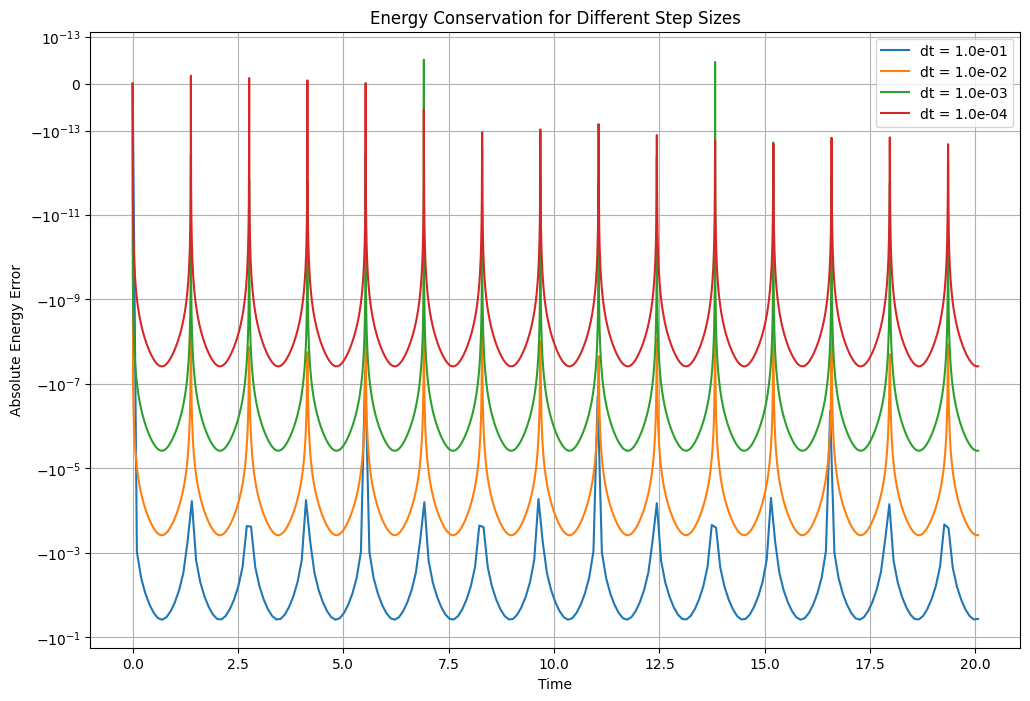

Step size: 1.0e-01
  Initial energy: 2.74e+00
  Max absolute energy error: 3.88e-02
  Mean absolute energy error: 1.58e-02

Step size: 1.0e-02
  Initial energy: 2.74e+00
  Max absolute energy error: 3.85e-04
  Mean absolute energy error: 1.57e-04

Step size: 1.0e-03
  Initial energy: 2.74e+00
  Max absolute energy error: 3.85e-06
  Mean absolute energy error: 1.57e-06

Step size: 1.0e-04
  Initial energy: 2.74e+00
  Max absolute energy error: 3.85e-08
  Mean absolute energy error: 1.57e-08



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

# Your existing parameter definitions
orbits = 10
x0 = 1
v0 = 0
x_s = 1
T = 2 * np.pi * np.sqrt(x0/const.g)  # Time per orbit

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def calculate_hamiltonian(x, v, x_s):
    kinetic = 0.5 * v**2
    potential = -const.g / np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))
    return kinetic + potential

def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    dt = t_final/(h-1)
    
    x = np.zeros(h)
    v = np.zeros(h)
    energy = np.zeros(h)

    x[0] = x0
    v[0] = v0
    energy[0] = calculate_hamiltonian(x[0], v[0], x_s)

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)
        energy[i+1] = calculate_hamiltonian(x[i+1], v[i+1], x_s)

    return t, x, v, energy

def plot_energy_conservation(stepsizes):
    plt.figure(figsize=(12, 8))
    
    for dt in stepsizes:
        t, x, v, energy = numerical_solution(x0, v0, x_s, dt, T, orbits)
        
        # Use absolute energy error instead of relative
        energy_error = energy - energy[0]
        
        plt.plot(t, energy_error, label=f'dt = {dt:.1e}')
    
    plt.xlabel('Time')
    plt.ylabel('Absolute Energy Error')
    plt.title('Energy Conservation for Different Step Sizes')
    plt.legend()
    plt.grid(True)
    plt.yscale('symlog', linthresh=1e-13)  # This allows us to see very small errors
    plt.show()

def print_energy_stats(stepsizes):
    for dt in stepsizes:
        t, x, v, energy = numerical_solution(x0, v0, x_s, dt, T, orbits)
        energy_error = energy - energy[0]
        max_error = np.max(np.abs(energy_error))
        mean_error = np.mean(np.abs(energy_error))
        print(f"Step size: {dt:.1e}")
        print(f"  Initial energy: {energy[0]:.2e}")
        print(f"  Max absolute energy error: {max_error:.2e}")
        print(f"  Mean absolute energy error: {mean_error:.2e}")
        print()

# Choose a range of step sizes to test
stepsizes = [1e-1, 1e-2, 1e-3, 1e-4]

# Plot energy conservation
plot_energy_conservation(stepsizes)

# Print energy statistics
print_energy_stats(stepsizes)

Step size: 0.1
Dominant frequency of energy error: 0.7463 Hz
Step size: 0.01
Dominant frequency of energy error: 0.7474 Hz
Step size: 0.001
Dominant frequency of energy error: 0.7476 Hz
Step size: 0.0001
Dominant frequency of energy error: 0.7476 Hz
Estimated natural frequency: 0.3977 Hz


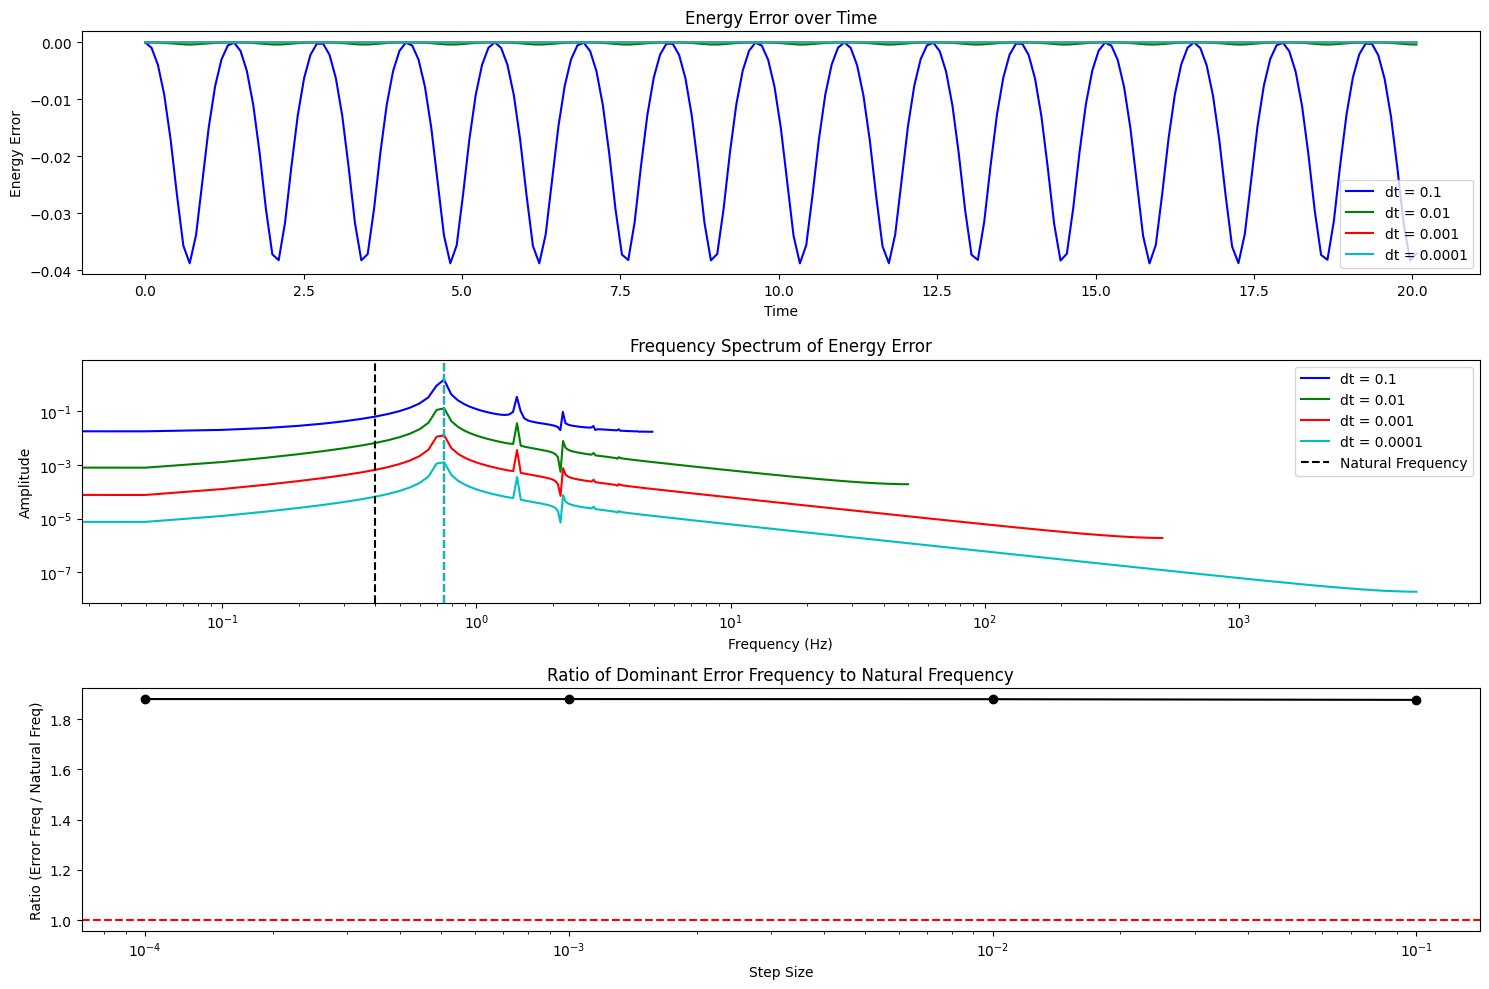

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def calculate_hamiltonian(x, v, x_s):
    kinetic = 0.5 * v**2
    potential = -const.g / np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))
    return kinetic + potential

def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    dt = t_final/(h-1)
    
    x = np.zeros(h)
    v = np.zeros(h)
    energy = np.zeros(h)

    x[0] = x0
    v[0] = v0
    energy[0] = calculate_hamiltonian(x[0], v[0], x_s)

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)
        energy[i+1] = calculate_hamiltonian(x[i+1], v[i+1], x_s)

    return t, x, v, energy

def estimate_natural_frequency(x_s):
    # Estimate natural frequency near equilibrium (x = 0)
    k_effective = const.g * 2 / (np.pi * x_s)  # Effective spring constant near x = 0
    omega = np.sqrt(k_effective)
    return omega / (2 * np.pi)  # Convert to Hz

def analyze_frequencies(dt):
    t, x, v, energy = numerical_solution(x0, v0, x_s, dt, T, orbits)
    energy_error = energy - energy[0]
    
    # Compute FFT of energy error
    N = len(t)
    yf = fft(energy_error)
    xf = fftfreq(N, dt)[:N//2]
    
    # Find dominant frequency (excluding DC component)
    dominant_freq = xf[np.argmax(np.abs(yf[1:N//2])) + 1]
    
    return t, energy_error, xf, np.abs(yf[0:N//2]), dominant_freq

# Set up the plot
plt.figure(figsize=(15, 10))

# Analyze for different step sizes
step_sizes = [1e-1, 1e-2, 1e-3, 1e-4]
colors = ['b', 'g', 'r', 'c']

for dt, color in zip(step_sizes, colors):
    t, energy_error, freq, amplitude, dominant_freq = analyze_frequencies(dt)
    
    # Plot energy error
    plt.subplot(3, 1, 1)
    plt.plot(t, energy_error, color=color, label=f'dt = {dt}')
    
    # Plot frequency spectrum
    plt.subplot(3, 1, 2)
    plt.plot(freq, amplitude, color=color, label=f'dt = {dt}')
    plt.axvline(dominant_freq, color=color, linestyle='--')

    print(f"Step size: {dt}")
    print(f"Dominant frequency of energy error: {dominant_freq:.4f} Hz")

# Calculate and plot natural frequency
natural_freq = estimate_natural_frequency(x_s)
print(f"Estimated natural frequency: {natural_freq:.4f} Hz")

plt.subplot(3, 1, 1)
plt.xlabel('Time')
plt.ylabel('Energy Error')
plt.title('Energy Error over Time')
plt.legend()

plt.subplot(3, 1, 2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum of Energy Error')
plt.axvline(natural_freq, color='k', linestyle='--', label='Natural Frequency')
plt.legend()
plt.xscale('log')
plt.yscale('log')

# Plot ratio of dominant frequency to natural frequency
plt.subplot(3, 1, 3)
ratios = [analyze_frequencies(dt)[4] / natural_freq for dt in step_sizes]
plt.semilogx(step_sizes, ratios, 'ko-')
plt.axhline(1, color='r', linestyle='--') 
plt.xlabel('Step Size')
plt.ylabel('Ratio (Error Freq / Natural Freq)')
plt.title('Ratio of Dominant Error Frequency to Natural Frequency')

plt.tight_layout()
plt.show()

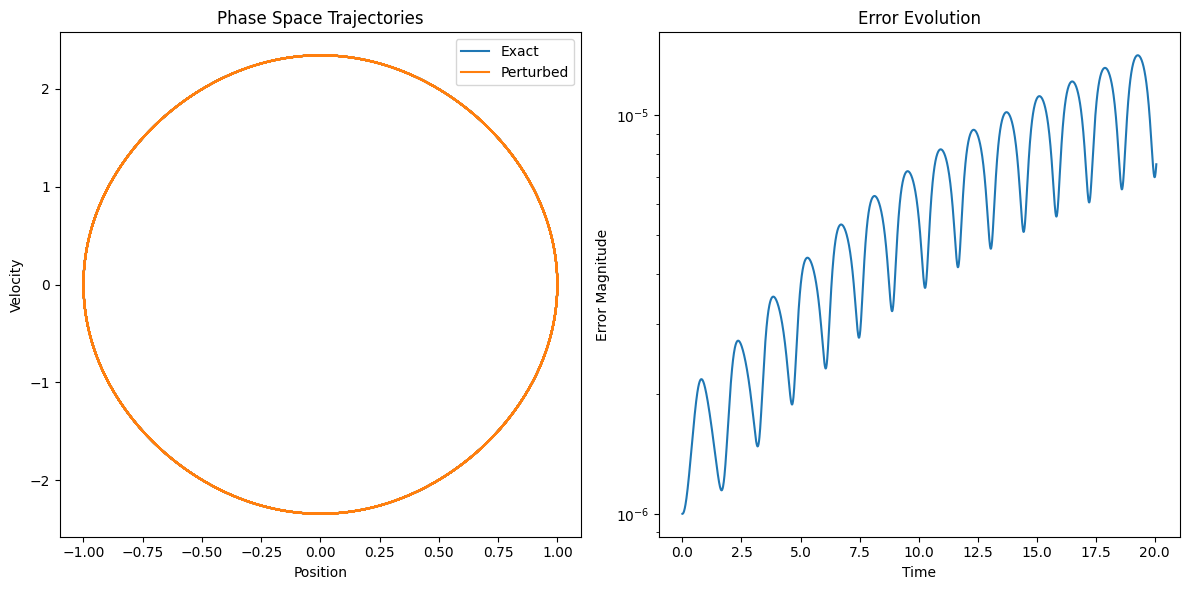

In [3]:
def phase_space_error(x0, v0, x_s, dt, num_orbits):
    t, x_exact, v_exact, _ = numerical_solution(x0, v0, x_s, dt, T, num_orbits)
    t, x_approx, v_approx, _ = numerical_solution(x0 + 1e-6, v0, x_s, dt, T, num_orbits)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(x_exact, v_exact, label='Exact')
    plt.plot(x_approx, v_approx, label='Perturbed')
    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.title('Phase Space Trajectories')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(t, np.sqrt((x_exact - x_approx)**2 + (v_exact - v_approx)**2))
    plt.xlabel('Time')
    plt.ylabel('Error Magnitude')
    plt.title('Error Evolution')
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

phase_space_error(x0, v0, x_s, 0.01, 10)

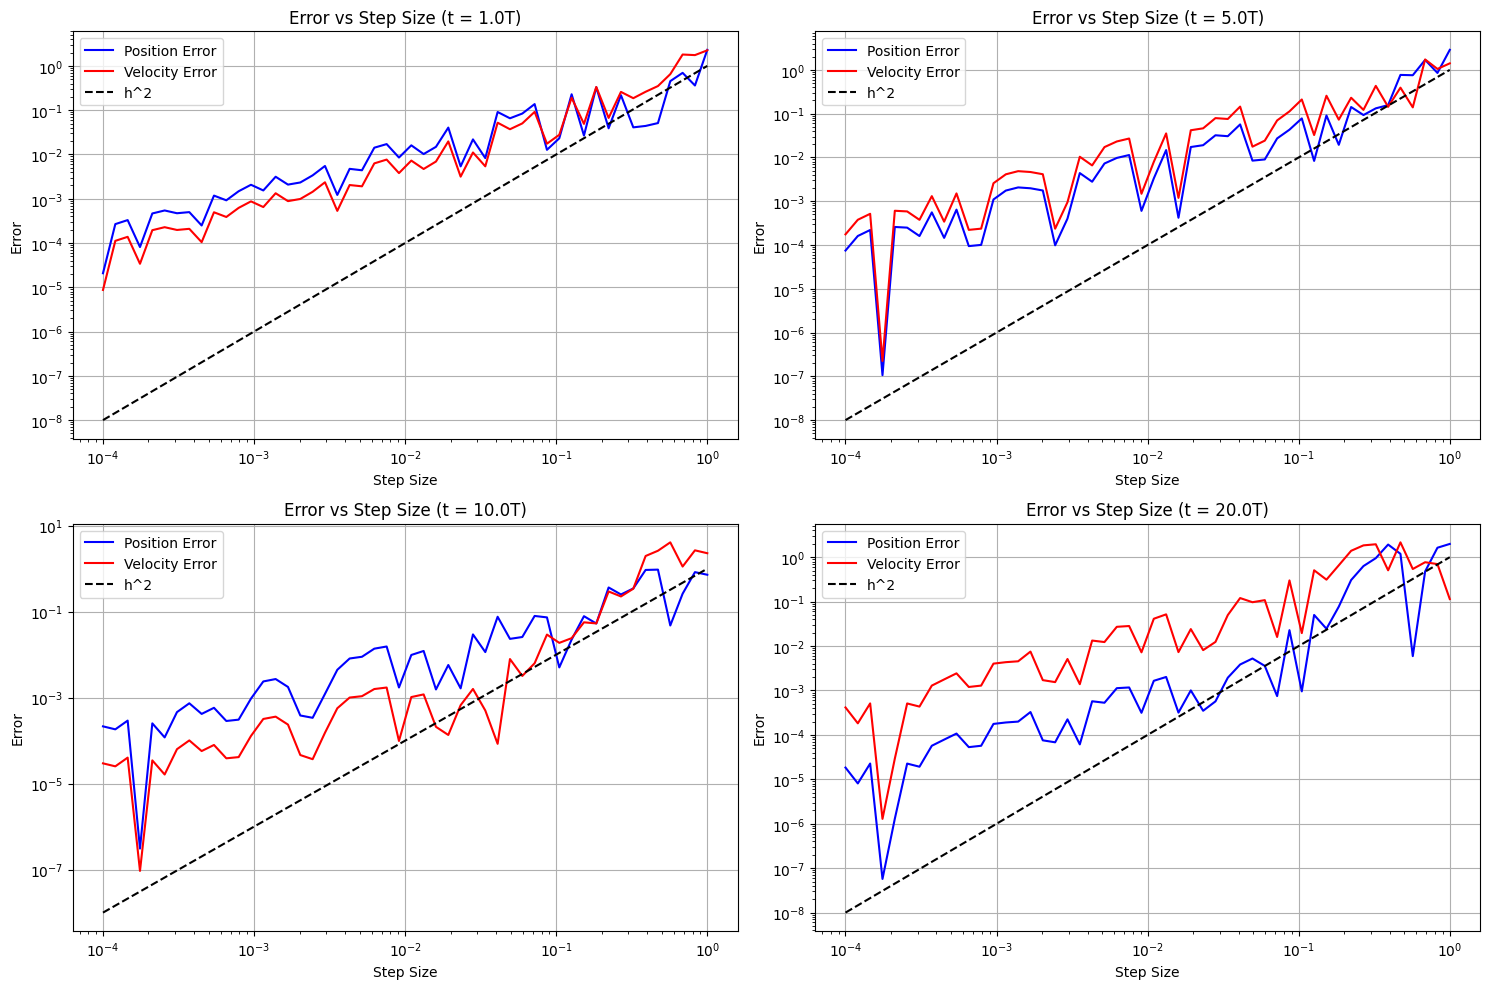

Lyapunov exponent: 0.03896374970164447


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

# System parameters
x0 = 1
v0 = 0
x_s = 1
w = np.sqrt(const.g / x_s)  # Approximate angular frequency
T = 2 * np.pi / w  # Approximate period

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def numerical_solution(x0, v0, x_s, dt, t_final):
    N = int(t_final / dt) + 1
    t = np.linspace(0, t_final, N)
    x = np.zeros(N)
    v = np.zeros(N)
    
    x[0] = x0
    v[0] = v0
    
    for i in range(1, N):
        v[i] = v[i-1] + 0.5 * dt * force(x[i-1], x_s)
        x[i] = x[i-1] + dt * v[i]
        v[i] = v[i] + 0.5 * dt * force(x[i], x_s)
    
    return t, x, v

def calculate_error(x0, v0, x_s, dt, t_final):
    t, x, v = numerical_solution(x0, v0, x_s, dt, t_final)
    t_ref, x_ref, v_ref = numerical_solution(x0, v0, x_s, dt/100, t_final)  # Reference solution
    
    # Interpolate reference solution to match time points of numerical solution
    x_ref_interp = np.interp(t, t_ref, x_ref)
    v_ref_interp = np.interp(t, t_ref, v_ref)
    
    error_x = np.abs(x[-1] - x_ref_interp[-1])
    error_v = np.abs(v[-1] - v_ref_interp[-1])
    
    return error_x, error_v

# Step sizes and simulation times
stepsizes = np.logspace(-4, 0, 50)
sim_times = [T, 5*T, 10*T, 20*T]  # Different simulation times

plt.figure(figsize=(15, 10))

for i, t_final in enumerate(sim_times, 1):
    errors_x = []
    errors_v = []
    
    for dt in stepsizes:
        error_x, error_v = calculate_error(x0, v0, x_s, dt, t_final)
        errors_x.append(error_x)
        errors_v.append(error_v)
    
    plt.subplot(2, 2, i)
    plt.loglog(stepsizes, errors_x, 'b-', label='Position Error')
    plt.loglog(stepsizes, errors_v, 'r-', label='Velocity Error')
    plt.loglog(stepsizes, stepsizes**2, 'k--', label='h^2')
    plt.xlabel('Step Size')
    plt.ylabel('Error')
    plt.title(f'Error vs Step Size (t = {t_final/T:.1f}T)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Print Lyapunov exponent
def lyapunov_exponent(x0, v0, x_s, dt, num_steps):
    d0 = 1e-9
    d = d0
    sum_log_ratios = 0
    
    x, v = x0, v0
    x_perturbed, v_perturbed = x0 + d0, v0
    
    for _ in range(num_steps):
        # Evolve original state
        v_half = v + 0.5 * dt * force(x, x_s)
        x_new = x + dt * v_half
        v_new = v_half + 0.5 * dt * force(x_new, x_s)
        
        # Evolve perturbed state
        v_half_perturbed = v_perturbed + 0.5 * dt * force(x_perturbed, x_s)
        x_new_perturbed = x_perturbed + dt * v_half_perturbed
        v_new_perturbed = v_half_perturbed + 0.5 * dt * force(x_new_perturbed, x_s)
        
        # Calculate new separation
        d_new = np.sqrt((x_new_perturbed - x_new)**2 + (v_new_perturbed - v_new)**2)
        
        # Add to sum of log ratios
        sum_log_ratios += np.log(d_new / d)
        
        # Renormalize
        factor = d0 / d_new
        x_new_perturbed = x_new + (x_new_perturbed - x_new) * factor
        v_new_perturbed = v_new + (v_new_perturbed - v_new) * factor
        
        x, v = x_new, v_new
        x_perturbed, v_perturbed = x_new_perturbed, v_new_perturbed
        d = d0
    
    return sum_log_ratios / (num_steps * dt)

lyap = lyapunov_exponent(x0, v0, x_s, 0.01, 10000)
print(f"Lyapunov exponent: {lyap}")

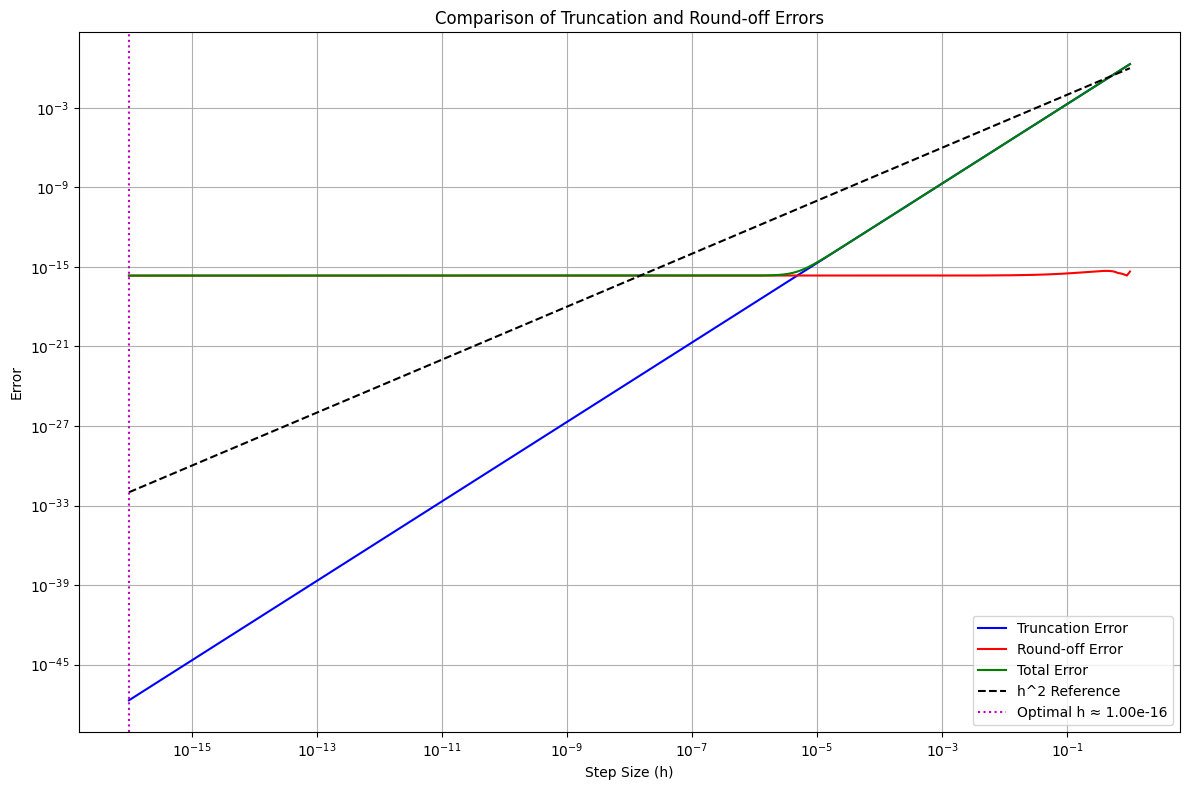

Optimal step size: 1.00e-16
Minimum total error: 2.22e-16


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def force(x, x_s):
    return -9.81 * 2 / np.pi * np.arctan(x / x_s)

def single_step_error(x, v, dt, x_s):
    # Perform a single step of the Velocity Verlet method
    v_half = v + 0.5 * dt * force(x, x_s)
    x_new = x + dt * v_half
    v_new = v_half + 0.5 * dt * force(x_new, x_s)
    
    # Calculate truncation error (assuming 3rd order local truncation error for Velocity Verlet)
    truncation_error = dt**3 * np.abs(force(x, x_s) * force(x, x_s) / 12)
    
    # Estimate round-off error
    round_off_error = np.finfo(float).eps * (np.abs(x_new) + np.abs(v_new))
    
    return truncation_error, round_off_error

def error_analysis(x0, v0, x_s, dt_range):
    truncation_errors = []
    round_off_errors = []
    total_errors = []
    
    for dt in dt_range:
        trunc, round_off = single_step_error(x0, v0, dt, x_s)
        truncation_errors.append(trunc)
        round_off_errors.append(round_off)
        total_errors.append(trunc + round_off)
    
    return np.array(truncation_errors), np.array(round_off_errors), np.array(total_errors)

# Parameters
x0 = 1.0
v0 = 0.0
x_s = 1.0

# Step size range (focusing on smaller step sizes)
dt_range = np.logspace(-16, 0, 1000)

# Compute errors
trunc_errors, round_off_errors, total_errors = error_analysis(x0, v0, x_s, dt_range)

# Plotting
plt.figure(figsize=(12, 8))
plt.loglog(dt_range, trunc_errors, 'b-', label='Truncation Error')
plt.loglog(dt_range, round_off_errors, 'r-', label='Round-off Error')
plt.loglog(dt_range, total_errors, 'g-', label='Total Error')
plt.loglog(dt_range, dt_range**2, 'k--', label='h^2 Reference')

plt.xlabel('Step Size (h)')
plt.ylabel('Error')
plt.title('Comparison of Truncation and Round-off Errors')
plt.legend()
plt.grid(True)

# Find and plot the optimal step size
optimal_idx = np.argmin(total_errors)
optimal_dt = dt_range[optimal_idx]
plt.axvline(optimal_dt, color='m', linestyle=':', label=f'Optimal h ≈ {optimal_dt:.2e}')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Optimal step size: {optimal_dt:.2e}")
print(f"Minimum total error: {total_errors[optimal_idx]:.2e}")